<a href="https://colab.research.google.com/github/SonaArajyan03/Startup_success_failure/blob/main/startupsuccess_failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Startup Success or Failure.**

*Our data exploration starts by checking that each entry is unique and there are no duplicates, corresponds to the number of observations. Then we print a report to look for missing values and check the data type for each column.*

# ***Importing libraries***


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from sklearn.preprocessing import LabelEncoder


In [42]:
missing=["No Info","None","none"]
data=pd.read_csv('data.csv',na_values=missing, encoding='latin1')
# Data Exploration
data.head() # Display the first few rows of the dataset
data.info()  # Get information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Columns: 116 entries, Company_Name to Renown score
dtypes: float64(38), int64(3), object(75)
memory usage: 427.9+ KB


In [43]:
# Providing an overview of the dataset size
total_rows = data.shape[0]
total_columns = data.shape[1]
print("Total entries in the dataset: {} rows and {} columns".format(total_rows, total_columns))



Total entries in the dataset: 472 rows and 116 columns


In [44]:
# Renaming columns with shorter names
new_column_names = {
    'Presence of a top angel or venture fund in previous round of investment': 'Presence_of_Top_Investor',
    'Capital intensive business e.g. e-commerce, Engineering products and operations can also cause a business to be capital intensive': 'Capital_Intensive',
    'Cross-Channel Analytics/ marketing channels': 'Cross-Channel_Analytics',
    'Owns data or not? (monetization of data) e.g. Factual': 'Data_Ownership',
    'Is the company an aggregator/market place? e.g. Bluekai': 'Aggregator_Marketplace',
    'Online or offline venture - physical location based business or online venture?': 'Online_Offline_Venture',
    "Top forums like 'Tech crunch' or 'Venture beat' talking about the company/model - How much is it being talked about?": "Top_Forum_Presence",
    'Technical proficiencies to analyse and interpret unstructured data': 'Technical_Data_Proficiency',
    'Survival through recession, based on existence of the company through recession times': 'Survival_through_Recession',
    'Avg time to investment - average across all rounds, measured from previous investment': 'Average_Time_to_Investment'
}

# Rename the columns
data.rename(columns=new_column_names, inplace=True)

# Display the updated DataFrame
data.columns
data


,Company_Name,Dependent-Company Status,year of founding,Age of company in years,Internet Activity Score,Short Description of company profile,Industry of company,Focus functions of company,Investors,Employee Count,...,Percent_skill_Data Science,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score
0,Company1,Success,NaN,NaN,-1.0,Video distribution,NaN,operation,KPCB Holdings|Draper Fisher Jurvetson (DFJ)|Kl...,3.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,Company2,Success,2011.0,3.0,125.0,NaN,Market Research|Marketing|Crowdfunding,"Marketing, sales",NaN,NaN,...,8.823529,21.764706,10.882353,2.941176,0.000000,0.0,0.0,0.0,0.0,8.0
2,Company3,Success,2011.0,3.0,455.0,Event Data Analytics API,Analytics|Cloud Computing|Software Development,operations,TechStars|Streamlined Ventures|Amplify Partner...,14.0,...,3.846154,17.094017,9.401709,0.000000,2.777778,0.0,0.0,0.0,0.0,9.0
3,Company4,Success,2009.0,5.0,-99.0,The most advanced analytics for mobile,Mobile|Analytics,Marketing & Sales,Michael Birch|Max Levchin|Sequoia Capital|Keit...,45.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,5.0
4,Company5,Success,2010.0,4.0,496.0,The Location-Based Marketing Platform,Analytics|Marketing|Enterprise Software,Marketing & Sales,DFJ Frontier|Draper Nexus Ventures|Gil Elbaz|A...,39.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,Company468,Failed,2011.0,3.0,-5.0,BtoB deal site,E-Commerce,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
468,Company469,Failed,NaN,NaN,NaN,NaN,NaN,consumer web,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
469,Company470,Failed,2010.0,4.0,0.0,Real Time Social Media Analytics,Analytics|E-Commerce,CAMPAIGN MANAGEMENT,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
470,Company471,Failed,2009.0,5.0,0.0,Social Media Publishing and Analytics,Analytics|Marketing,SOCIALMEDIA CAMPAIGN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
data

,Company_Name,Dependent-Company Status,year of founding,Age of company in years,Internet Activity Score,Short Description of company profile,Industry of company,Focus functions of company,Investors,Employee Count,...,Percent_skill_Data Science,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score
0,Company1,Success,NaN,NaN,-1.0,Video distribution,NaN,operation,KPCB Holdings|Draper Fisher Jurvetson (DFJ)|Kl...,3.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,Company2,Success,2011.0,3.0,125.0,NaN,Market Research|Marketing|Crowdfunding,"Marketing, sales",NaN,NaN,...,8.823529,21.764706,10.882353,2.941176,0.000000,0.0,0.0,0.0,0.0,8.0
2,Company3,Success,2011.0,3.0,455.0,Event Data Analytics API,Analytics|Cloud Computing|Software Development,operations,TechStars|Streamlined Ventures|Amplify Partner...,14.0,...,3.846154,17.094017,9.401709,0.000000,2.777778,0.0,0.0,0.0,0.0,9.0
3,Company4,Success,2009.0,5.0,-99.0,The most advanced analytics for mobile,Mobile|Analytics,Marketing & Sales,Michael Birch|Max Levchin|Sequoia Capital|Keit...,45.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,5.0
4,Company5,Success,2010.0,4.0,496.0,The Location-Based Marketing Platform,Analytics|Marketing|Enterprise Software,Marketing & Sales,DFJ Frontier|Draper Nexus Ventures|Gil Elbaz|A...,39.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,Company468,Failed,2011.0,3.0,-5.0,BtoB deal site,E-Commerce,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
468,Company469,Failed,NaN,NaN,NaN,NaN,NaN,consumer web,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
469,Company470,Failed,2010.0,4.0,0.0,Real Time Social Media Analytics,Analytics|E-Commerce,CAMPAIGN MANAGEMENT,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
470,Company471,Failed,2009.0,5.0,0.0,Social Media Publishing and Analytics,Analytics|Marketing,SOCIALMEDIA CAMPAIGN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
data.isna().sum()

Company_Name                 0
Dependent-Company Status     0
year of founding            59
Age of company in years     59
Internet Activity Score     65
                            ..
Percent_skill_Law           61
Percent_skill_Consulting    61
Percent_skill_Finance       61
Percent_skill_Investment    61
Renown score                61
Length: 116, dtype: int64

In [47]:
data.duplicated(subset=['Company_Name'])

0      False
1      False
2      False
3      False
4      False
       ...  
467    False
468    False
469    False
470    False
471    False
Length: 472, dtype: bool



1. There are missing values in the dataset.
2. There are no duplicate values.
3. The dataset contains numerical and categorical features.
4. Some columns have incorrect data types.

### Data Overview
- The dataset contains missing values that need to be handled before further analysis.
- No duplicate values were found in the dataset.

### Data Types
- Upon inspection, the dataset consists of columns with various data types:
  - float64 (38 columns)
  - int64 (3 columns)
  - object (75 columns)
- Incorrect data types may hinder analysis and should be corrected.

### Handling Missing Values
- Missing values will be replaced with NaN values for consistency.
- The NaN values will then be filled using appropriate methods such as mean, mode, etc., depending on the nature of the data.

### Conclusion
- Addressing missing values and correcting data types are crucial steps in preparing the dataset for analysis.
- Once these steps are completed, the dataset will be ready for further exploration and modeling.



In [58]:
# data['year of founding'].value_counts()

This part of the code performs essential data preprocessing tasks:

1. **Date Conversion**: Converts date columns to datetime format for better analysis.

2. **Funding Amount Conversion**: Converts funding amount column to float type after replacing inconsistent values.

3. **Categorical Values Standardization**: Standardizes categorical values to ensure consistency.

4. **Data Type Conversion**: Converts categorical columns to category data type for efficient memory usage.

5. **Label Encoding**: Encodes the target variable to numerical values for modeling purposes.

These steps ensure data uniformity and prepare the dataset for analysis.

In [48]:
# converting  Est. Founding Date and Last Funding Date from object to datetime
data["Est. Founding Date"]=pd.to_datetime(data["Est. Founding Date"])
data["Last Funding Date"]=pd.to_datetime(data["Last Funding Date"])
# converting Last round of funding received (in milionUSD) from object to float
# it is object variable because it consists of a string "unknown amount" in it,so replacing it with nan and converting
# the particular column to float
data["Last round of funding received (in milionUSD)"].replace({"unknown amount":np.nan},inplace=True)
data["Last round of funding received (in milionUSD)"]=data["Last round of funding received (in milionUSD)"].astype(float)
# data types in the data set
dtypes=pd.DataFrame(data.dtypes,columns=["Data Types"])
dtypes

,Data Types
Company_Name,object
Dependent-Company Status,object
year of founding,float64
Age of company in years,float64
Internet Activity Score,float64
...,...
Percent_skill_Law,float64
Percent_skill_Consulting,float64
Percent_skill_Finance,float64
Percent_skill_Investment,float64


In [49]:
# Read the CSV file into a DataFrame
data = pd.read_csv('data.csv', na_values=missing, encoding='latin1')

# Fill missing values with NaN
data.replace({'0': np.nan, 0: np.nan}, inplace=True)

# Replace inconsistent values in categorical columns
replace_dict = {
    'Has the team size grown': {'yes': 'Yes', 'YES': 'Yes'},
    'Cloud or platform based serive/product?': {'cloud': 'Cloud'},
    'Local or global player': {'local': 'Local', 'LOCAL': 'Local', 'GLObaL': 'Global', 'global': 'Global'}
}
data.replace(replace_dict, inplace=True)

# Convert data types
data['Has the team size grown'] = data['Has the team size grown'].astype('category')
data['Cloud or platform based serive/product?'] = data['Cloud or platform based serive/product?'].astype('category')
data['Local or global player'] = data['Local or global player'].astype('category')
# Repeat this process for other columns as needed

# Check unique values again to verify the changes
cols = data.select_dtypes(include="category")
for col in cols:
    print(col)
    print("="*80)
    unique = data[col].unique()
    print(unique)
    print("="*80)

# Check the data types and unique values after conversion
print(data.dtypes)




Has the team size grown
['No', 'Yes', NaN]
Categories (2, object): ['No', 'Yes']
Cloud or platform based serive/product?
['Platform', 'Cloud', NaN, 'Both']
Categories (3, object): ['Both', 'Cloud', 'Platform']
Local or global player
['Global', 'Local', 'GLOBAL', NaN, 'local  ']
Categories (4, object): ['GLOBAL', 'Global', 'Local', 'local  ']
Company_Name                 object
Dependent-Company Status     object
year of founding            float64
Age of company in years     float64
Internet Activity Score     float64
                             ...   
Percent_skill_Law           float64
Percent_skill_Consulting    float64
Percent_skill_Finance       float64
Percent_skill_Investment    float64
Renown score                float64
Length: 116, dtype: object


In [50]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the "Dependent-Company Status" column
data['Dependent-Company Status'] = label_encoder.fit_transform(data['Dependent-Company Status'])
data

,Company_Name,Dependent-Company Status,year of founding,Age of company in years,Internet Activity Score,Short Description of company profile,Industry of company,Focus functions of company,Investors,Employee Count,...,Percent_skill_Data Science,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score
0,Company1,1,NaN,NaN,-1.0,Video distribution,NaN,operation,KPCB Holdings|Draper Fisher Jurvetson (DFJ)|Kl...,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Company2,1,2011.0,3.0,125.0,NaN,Market Research|Marketing|Crowdfunding,"Marketing, sales",NaN,NaN,...,8.823529,21.764706,10.882353,2.941176,NaN,NaN,NaN,NaN,NaN,8.0
2,Company3,1,2011.0,3.0,455.0,Event Data Analytics API,Analytics|Cloud Computing|Software Development,operations,TechStars|Streamlined Ventures|Amplify Partner...,14.0,...,3.846154,17.094017,9.401709,NaN,2.777778,NaN,NaN,NaN,NaN,9.0
3,Company4,1,2009.0,5.0,-99.0,The most advanced analytics for mobile,Mobile|Analytics,Marketing & Sales,Michael Birch|Max Levchin|Sequoia Capital|Keit...,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4,Company5,1,2010.0,4.0,496.0,The Location-Based Marketing Platform,Analytics|Marketing|Enterprise Software,Marketing & Sales,DFJ Frontier|Draper Nexus Ventures|Gil Elbaz|A...,39.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,Company468,0,2011.0,3.0,-5.0,BtoB deal site,E-Commerce,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
468,Company469,0,NaN,NaN,NaN,NaN,NaN,consumer web,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
469,Company470,0,2010.0,4.0,NaN,Real Time Social Media Analytics,Analytics|E-Commerce,CAMPAIGN MANAGEMENT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
470,Company471,0,2009.0,5.0,NaN,Social Media Publishing and Analytics,Analytics|Marketing,SOCIALMEDIA CAMPAIGN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
# Exclude non-numeric columns from correlation calculation
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Sort correlations with "Company_Status"
correlation_with_company_status = correlation_matrix['Dependent-Company Status'].sort_values(ascending=False)

print(correlation_with_company_status)


Dependent-Company Status                                                                 1.000000
Employees count MoM change                                                               0.367246
Internet Activity Score                                                                  0.311991
year of founding                                                                         0.297469
Percent_skill_Consulting                                                                 0.275591
Number of of advisors                                                                    0.263887
Team size Senior leadership                                                              0.255690
Renowned in professional circle                                                          0.178647
Percent_skill_Law                                                                        0.174321
Number of Co-founders                                                                    0.160916
Number of Investors 

In [52]:
# # Iterate over each column in the dataframe
# for column in data.columns:
#     # Skip the 'Dependent-Company Status ' column itself
#     if column == 'Dependent-Company Status ':
#         continue

#     # Create pair plot for the current column and 'Dependent-Company Status '
#     sns.pairplot(data, x_vars=column, y_vars=['Dependent-Company Status '])
#     plt.title(f'Pair Plot for {column} vs Dependent-Company Status ')
#     plt.show()

# checking for null values in the dataset
null=pd.DataFrame(data.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(data.isna().sum()/len(data)*100)
null_value = null.style.background_gradient(cmap='twilight_shifted',low =0.2,high=0.1)
null_value

,Null Values,% Missing Values
Company_Name,0,0.000000
Dependent-Company Status,0,0.000000
year of founding,59,12.500000
Age of company in years,59,12.500000
Internet Activity Score,87,18.432203
Short Description of company profile,149,31.567797
Industry of company,124,26.271186
Focus functions of company,30,6.355932
Investors,140,29.661017
Employee Count,189,40.042373


***Observations***:
- Drop columns with >45% missing values.
- Strategy for missing values:
  1. Impute missing values in columns with <45% missing values.
  2.For continuous variables, use Mean or Median based on distribution.
  3. For categorical variables, use Mode.

In [53]:
# Calculate percentage of missing values for each column
missing_percent = (data.isnull().sum() / len(data)) * 100

# Filter out columns with more than 45% missing values
columns_to_drop = missing_percent[missing_percent > 45].index

# Drop the selected columns
data_cleaned = data.drop(columns=columns_to_drop)

# Display the remaining columns
print(data_cleaned.columns)


Index(['Company_Name', 'Dependent-Company Status', 'year of founding',
       'Age of company in years', 'Internet Activity Score',
       'Short Description of company profile', 'Industry of company',
       'Focus functions of company', 'Investors', 'Employee Count',
       'Has the team size grown', 'Est. Founding Date', 'Last Funding Date',
       'Last Funding Amount', 'Country of company', 'Continent of company',
       'Number of Co-founders', 'Team size Senior leadership',
       'Team size all employees',
       'Presence of a top angel or venture fund in previous round of investment',
       'Number of  Sales Support material', 'Worked in top companies',
       'Average size of companies worked for in the past',
       'Have been part of startups in the past?',
       'Have been part of successful startups in the past?',
       'Was he or she partner in Big 5 consulting?', 'Consulting experience?',
       'Product or service company?',
       'Catering to product/service acro

In [54]:

describe=data.describe(include =['float', 'int'])
describe.T.style.background_gradient(cmap='twilight',low=0.2,high=0.1)

,count,mean,std,min,25%,50%,75%,max
Dependent-Company Status,472.000000,0.646186,0.478660,0.000000,0.000000,1.000000,1.000000,1.000000
year of founding,413.000000,2009.394673,2.607247,1997.000000,2008.000000,2010.000000,2011.000000,2013.000000
Age of company in years,413.000000,4.605327,2.607247,1.000000,3.000000,4.000000,6.000000,17.000000
Internet Activity Score,385.000000,120.683117,230.318164,-725.000000,-5.000000,68.000000,224.000000,1535.000000
Employee Count,283.000000,33.961131,64.508523,1.000000,6.000000,14.000000,33.500000,594.000000
Employees count MoM change,151.000000,-2.298013,31.879940,-100.000000,-2.000000,5.000000,9.500000,50.000000
Last Funding Amount,312.000000,6379489.435897,9901621.781409,10000.000000,750000.000000,2800000.000000,7850000.000000,77000000.000000
Number of Investors in Seed,202.000000,3.237624,3.590060,1.000000,1.000000,2.000000,3.750000,24.000000
Number of Investors in Angel and or VC,101.000000,2.415842,1.935290,1.000000,1.000000,2.000000,3.000000,9.000000
Number of Co-founders,410.000000,2.151220,0.946780,1.000000,2.000000,2.000000,3.000000,7.000000


***Observation:***

High cardinality features with numerous unique values suggest potential duplicate strings within categorical variables. Cleaning these features is imperative for accurate analysis and maintaining data integrity.

In [56]:
print(data.describe(include=["O"]))

# filling the missing values with nan values in the data set
data=data.fillna(np.nan)
data

       Company_Name Short Description of company profile Industry of company  \
count           472                                  323                 348   
unique          472                                  313                 192   
top        Company1                   Big Data Analytics           Analytics   
freq              1                                    4                  53   

       Focus functions of company  Investors Est. Founding Date  \
count                         442        332                363   
unique                        164        319                160   
top                    Operations  TechStars           1/1/2011   
freq                           31          7                 30   

       Last Funding Date Country of company Continent of company  \
count                350                401                  401   
unique               284                 22                    4   
top             1/1/2011      United States        North Am

,Company_Name,Dependent-Company Status,year of founding,Age of company in years,Internet Activity Score,Short Description of company profile,Industry of company,Focus functions of company,Investors,Employee Count,...,Percent_skill_Data Science,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score
0,Company1,1,NaN,NaN,-1.0,Video distribution,NaN,operation,KPCB Holdings|Draper Fisher Jurvetson (DFJ)|Kl...,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Company2,1,2011.0,3.0,125.0,NaN,Market Research|Marketing|Crowdfunding,"Marketing, sales",NaN,NaN,...,8.823529,21.764706,10.882353,2.941176,NaN,NaN,NaN,NaN,NaN,8.0
2,Company3,1,2011.0,3.0,455.0,Event Data Analytics API,Analytics|Cloud Computing|Software Development,operations,TechStars|Streamlined Ventures|Amplify Partner...,14.0,...,3.846154,17.094017,9.401709,NaN,2.777778,NaN,NaN,NaN,NaN,9.0
3,Company4,1,2009.0,5.0,-99.0,The most advanced analytics for mobile,Mobile|Analytics,Marketing & Sales,Michael Birch|Max Levchin|Sequoia Capital|Keit...,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4,Company5,1,2010.0,4.0,496.0,The Location-Based Marketing Platform,Analytics|Marketing|Enterprise Software,Marketing & Sales,DFJ Frontier|Draper Nexus Ventures|Gil Elbaz|A...,39.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,Company468,0,2011.0,3.0,-5.0,BtoB deal site,E-Commerce,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
468,Company469,0,NaN,NaN,NaN,NaN,NaN,consumer web,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
469,Company470,0,2010.0,4.0,NaN,Real Time Social Media Analytics,Analytics|E-Commerce,CAMPAIGN MANAGEMENT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
470,Company471,0,2009.0,5.0,NaN,Social Media Publishing and Analytics,Analytics|Marketing,SOCIALMEDIA CAMPAIGN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
# Selecting only numerical columns
numerical_columns = data.select_dtypes(include=[np.number])

# Computing the correlation matrix
correlation_matrix = numerical_columns.corr()

# Sorting correlation with 'Company_Status'
correlation_with_company_status = correlation_matrix['Dependent-Company Status'].sort_values()
print(correlation_with_company_status)


google page rank of company website                                                     -0.300163
Age of company in years                                                                 -0.297469
Percent_skill_Business Strategy                                                         -0.207776
Percent_skill_Sales                                                                     -0.177802
Renown score                                                                            -0.098225
Percent_skill_Domain                                                                    -0.084977
Percent_skill_Product Management                                                        -0.060105
Percent_skill_Marketing                                                                 -0.049813
Skills score                                                                            -0.048165
Percent_skill_Operations                                                                -0.041723
Last Funding Amount 

Based on the provided correlation coefficients with the dependent variable "Dependent-Company Status," the features that exhibit the strongest positive correlations with company success (i.e., a higher likelihood of a company being successful) include:

1. Number of Co-founders
2. Percent_skill_Law
3. Renowned in professional circle
4. Percent_skill_Data Science
5. Number of Investors in Seed

These features show the highest positive correlations with the company's success, indicating that companies with more co-founders, legal expertise, professional recognition, skills in data science, and a higher number of investors in seed funding are more likely to succeed.

Conversely, the features with the strongest negative correlations with company success (i.e., a higher likelihood of a company failing) include:

1. Internet Activity Score
2. Employees count MoM change
3. Team size Senior leadership
4. Number of of advisors
5. Percent_skill_Consulting

These features demonstrate the highest negative correlations with the company's success, suggesting that companies with lower internet activity scores, fluctuating employee counts, smaller senior leadership teams, fewer advisors, and lower skills in consulting are more likely to fail.

However, it's essential to remember that correlation does not imply causation, and further analysis is needed to understand the causal relationships between these features and company success or failure.



***And here is Analysis some important columns with respect to the dependent feature***

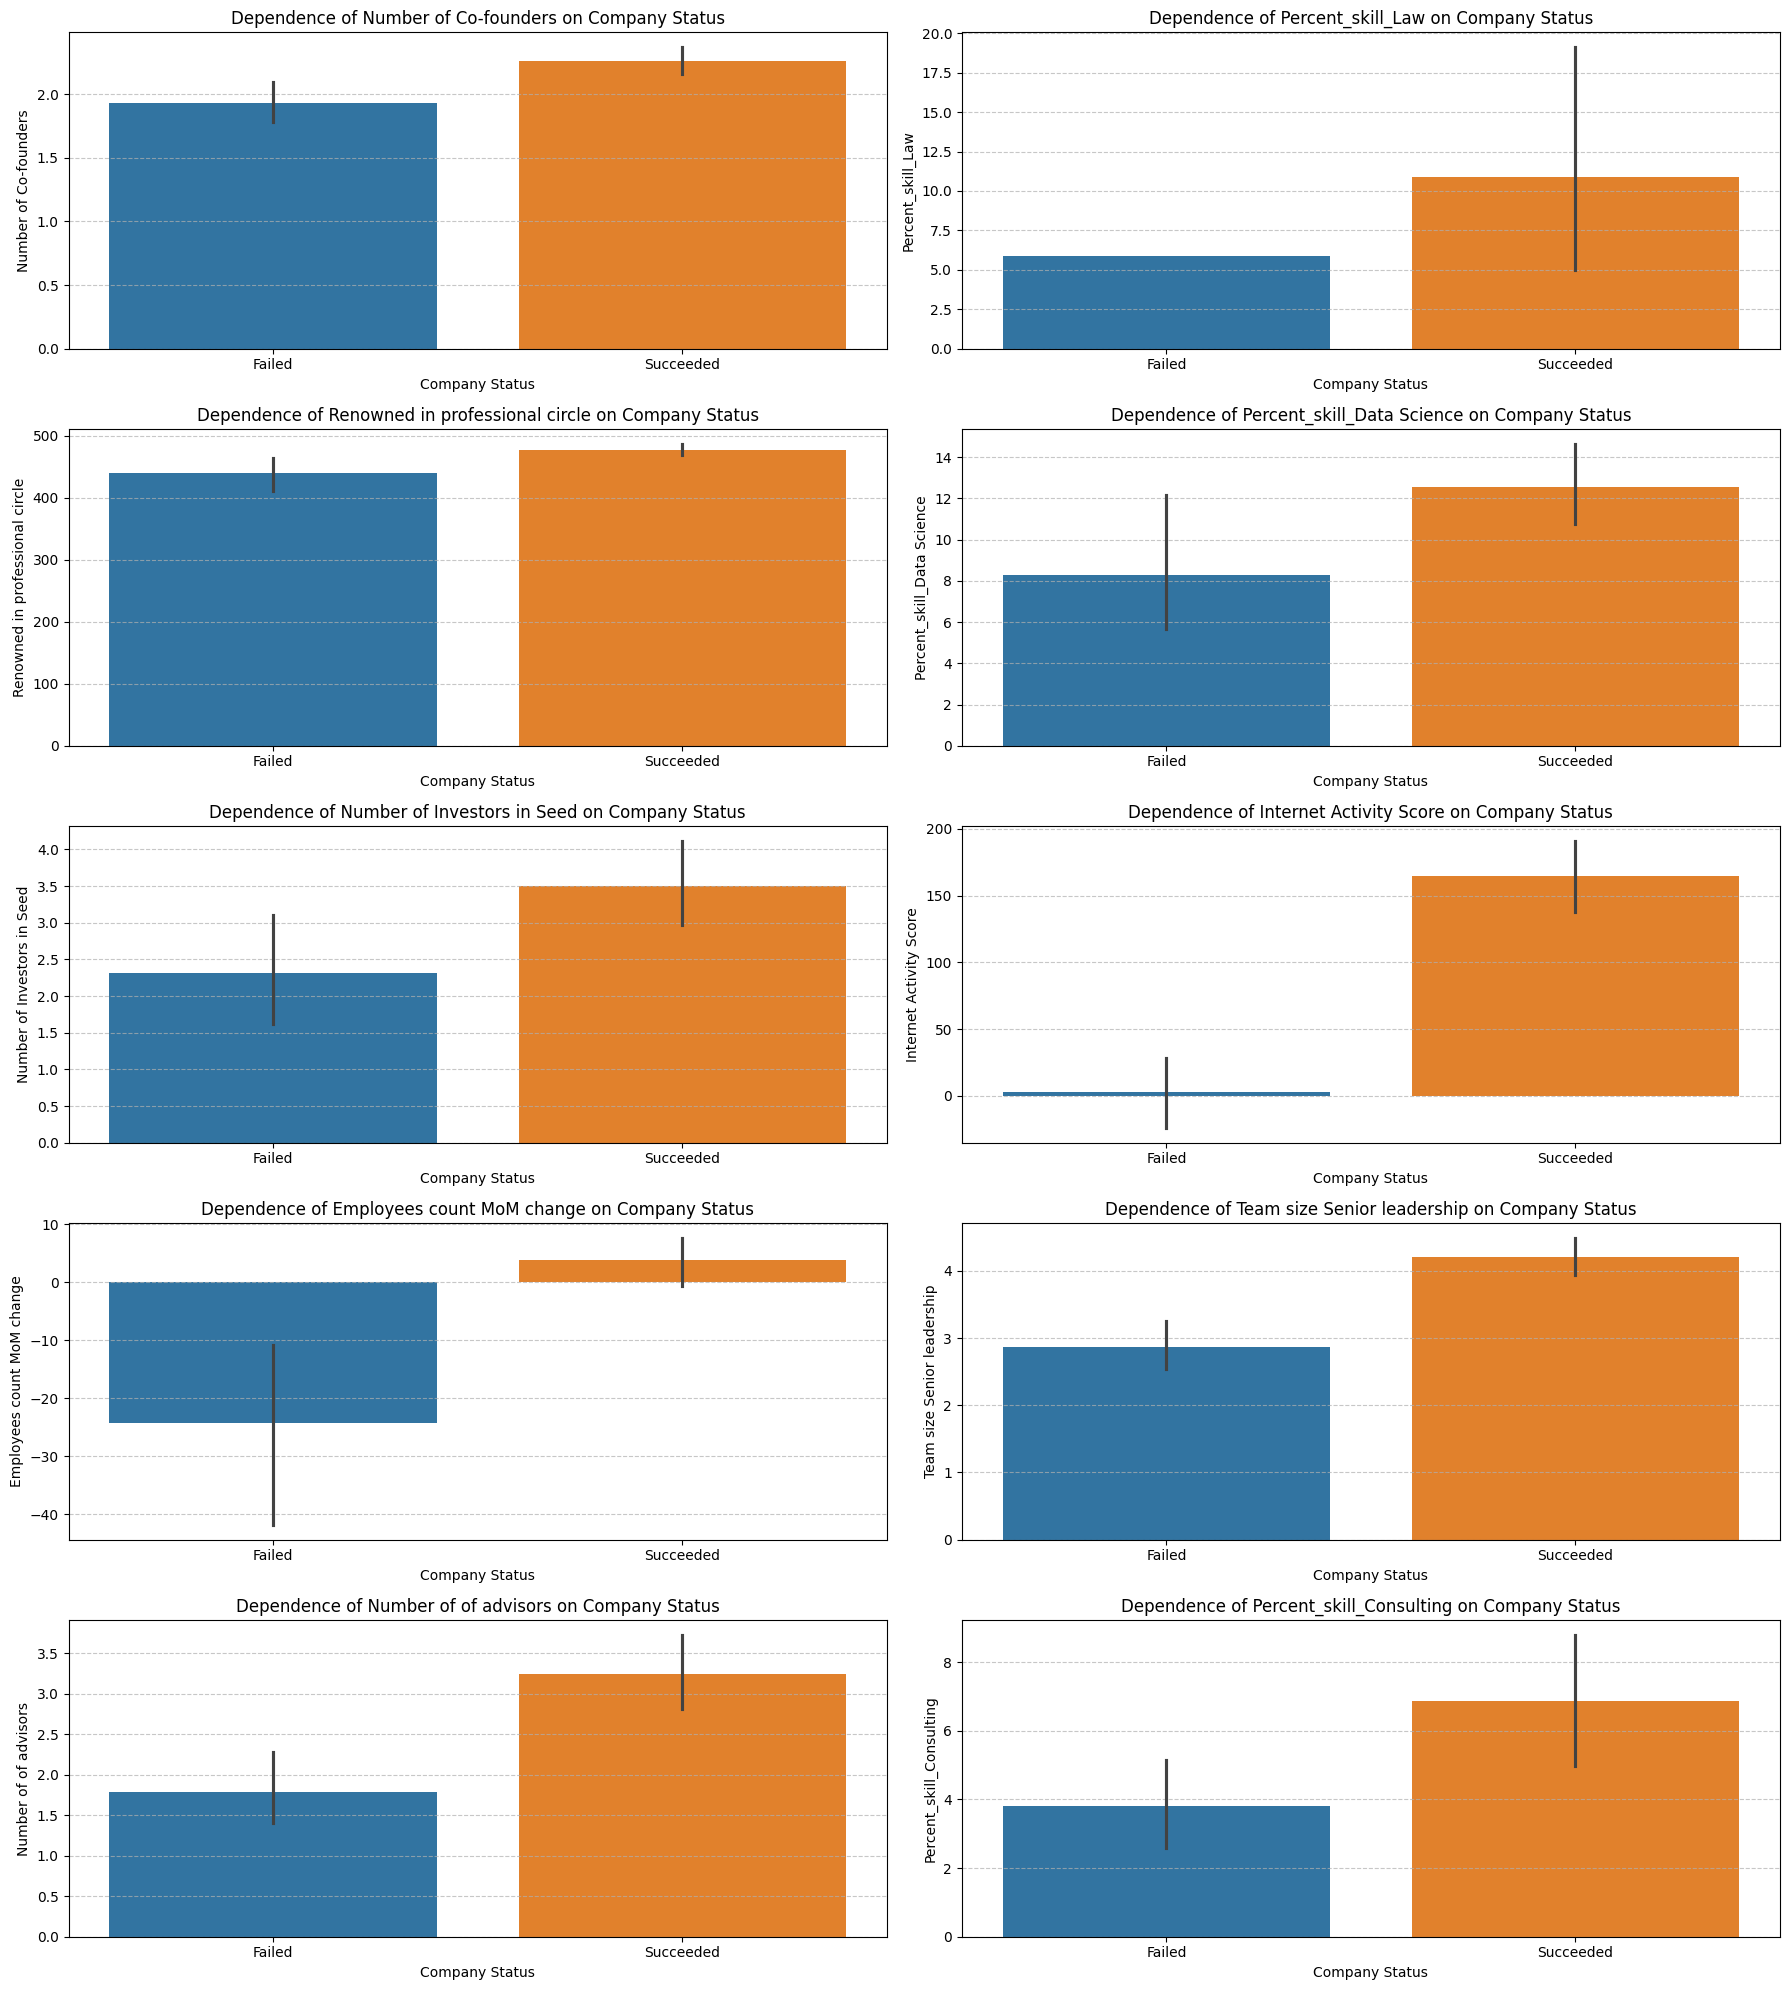

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Features to analyze
features = ['Number of Co-founders', 'Percent_skill_Law', 'Renowned in professional circle',
            'Percent_skill_Data Science', 'Number of Investors in Seed', 'Internet Activity Score',
            'Employees count MoM change', 'Team size Senior leadership', 'Number of of advisors',
            'Percent_skill_Consulting']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(18, 20))
axes = axes.flatten()

# Plotting each feature
for i, feature in enumerate(features):
    sns.barplot(data=data, x='Dependent-Company Status', y=feature, ax=axes[i], hue='Dependent-Company Status', legend=False)
    axes[i].set_title(f'Dependence of {feature} on Company Status')
    axes[i].set_xlabel('Company Status')
    axes[i].set_ylabel(feature)
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['Failed', 'Succeeded'])
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()




*These observations provide insights into the potential factors influencing company success or failure based on the selected features. However, further analysis and domain knowledge are necessary to validate these findings and understand the causal relationships between these features and company outcomes.*

***Based on what we observed earlier, we want to remove columns from the dataset that have weak correlation coefficients (less than 0.1) with the target variable "Dependent-Company Status". This helps us focus on the columns that have stronger connections to whether a company succeeds or fails. The dataset after this filtering process, called `data_filtered`, will only include columns that are more closely related to the target variable***

In [58]:
# Drop columns with weak correlation coefficients
weak_corr_threshold = 0.1  # Set your threshold for weak correlation here

# Filter columns with correlation coefficients less than the threshold
weak_corr_columns = correlation_with_company_status[abs(correlation_with_company_status) < weak_corr_threshold].index

# Drop the weakly correlated columns from the dataset
data_filtered = data.drop(columns=weak_corr_columns)

# Display the filtered dataset
print(data_filtered.head())


  Company_Name  Dependent-Company Status  year of founding  \
0     Company1                         1               NaN   
1     Company2                         1            2011.0   
2     Company3                         1            2011.0   
3     Company4                         1            2009.0   
4     Company5                         1            2010.0   

   Age of company in years  Internet Activity Score  \
0                      NaN                     -1.0   
1                      3.0                    125.0   
2                      3.0                    455.0   
3                      5.0                    -99.0   
4                      4.0                    496.0   

     Short Description of company profile  \
0                      Video distribution   
1                                     NaN   
2                Event Data Analytics API   
3  The most advanced analytics for mobile   
4   The Location-Based Marketing Platform   

                         

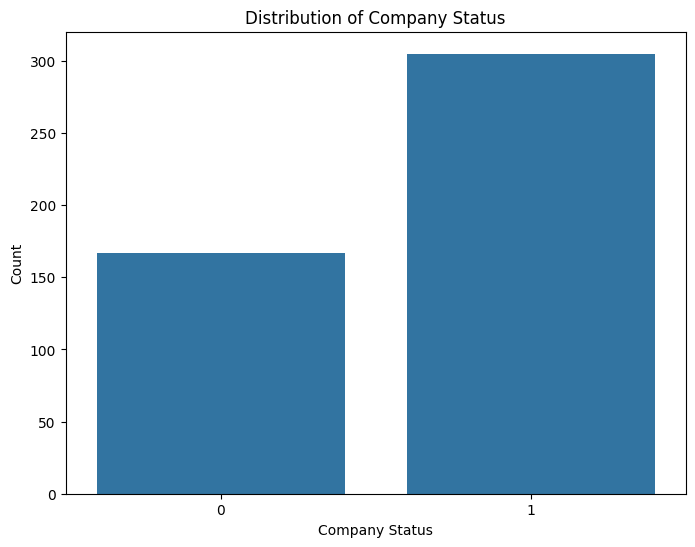

In [61]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Create a count plot for the 'Dependent-Company Status' column
sns.countplot(data=data_filtered, x='Dependent-Company Status')

# Set plot title and labels
plt.title('Distribution of Company Status')
plt.xlabel('Company Status')
plt.ylabel('Count')

# Show the plot
plt.show()


***The bar chart shows that 64.62% of companies or startups have succeeded, while 35.38% have failed. This suggests that there is a relatively balanced distribution between successful and failed startups in the dataset. Further analysis is needed to understand the reasons behind startup success or failure.***

Text(0, 0.5, 'Count')

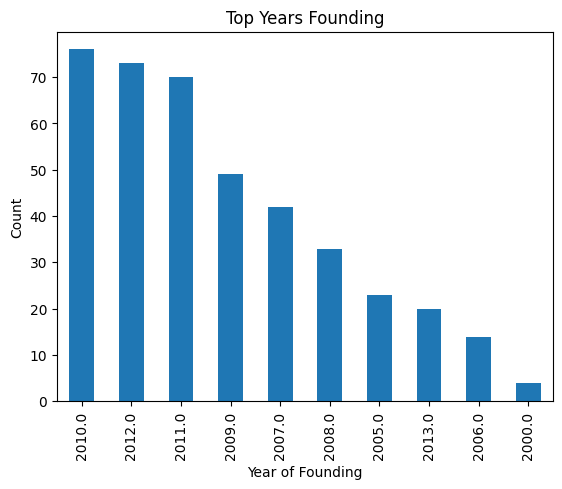

In [62]:
ax = data['year of founding'].value_counts() \
.head(10)\
.plot(kind='bar', title='Top Years Founding')
ax.set_xlabel('Year of Founding')
ax.set_ylabel('Count')

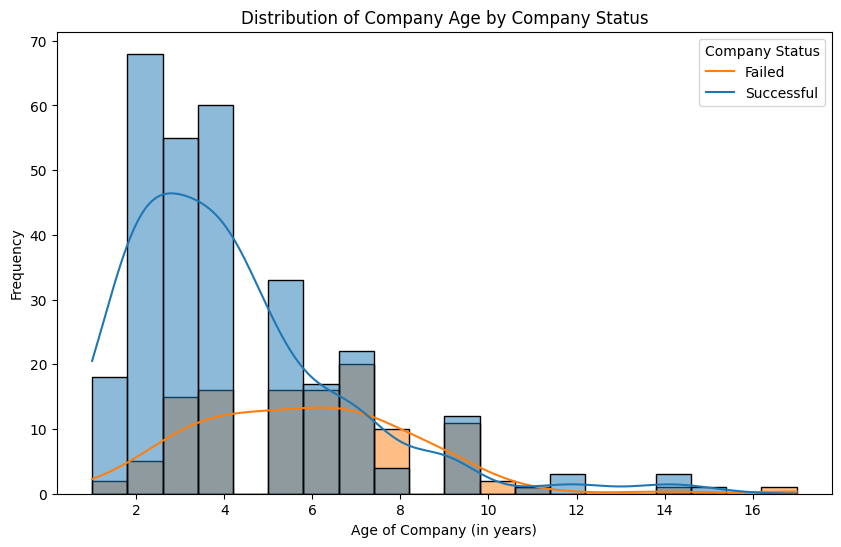

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age of company in years', hue='Dependent-Company Status', kde=True)

# Customize legend labels
plt.legend(title='Company Status', labels=['Failed', 'Successful'])

plt.title('Distribution of Company Age by Company Status')
plt.xlabel('Age of Company (in years)')
plt.ylabel('Frequency')
plt.show()


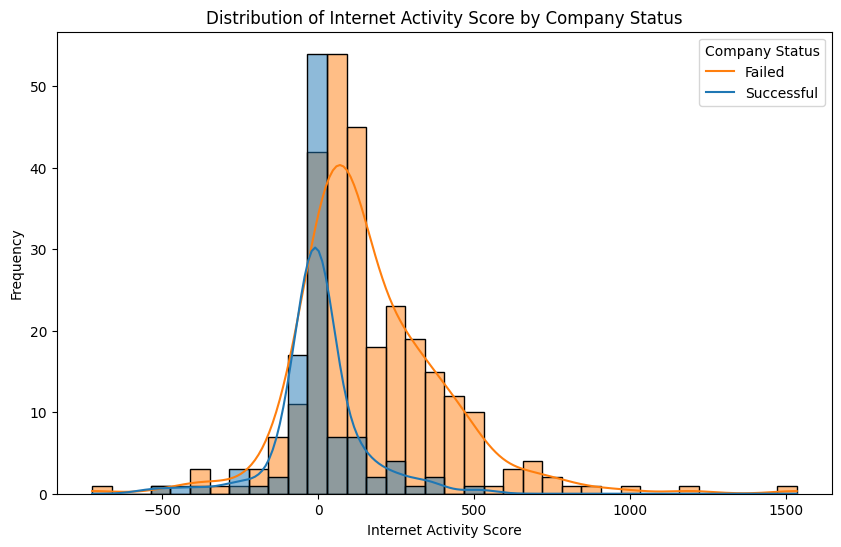

In [63]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Internet Activity Score', hue='Dependent-Company Status', kde=True)

# Customize legend labels
plt.legend(title='Company Status', labels=['Failed', 'Successful'])

plt.title('Distribution of Internet Activity Score by Company Status')
plt.xlabel('Internet Activity Score')
plt.ylabel('Frequency')
plt.show()


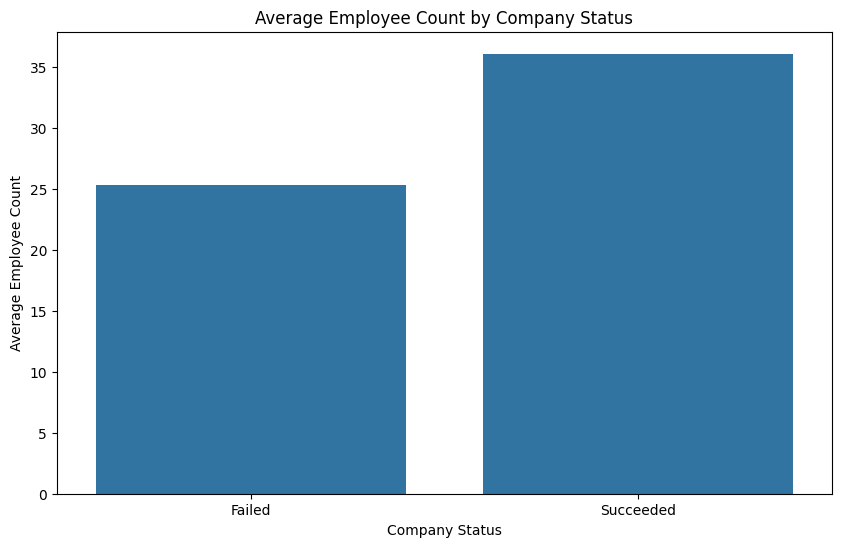

In [64]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Dependent-Company Status', y='Employee Count', errorbar=None)
plt.title('Average Employee Count by Company Status')
plt.xlabel('Company Status')
plt.ylabel('Average Employee Count')
plt.xticks(ticks=[0, 1], labels=['Failed', 'Succeeded'])
plt.show()



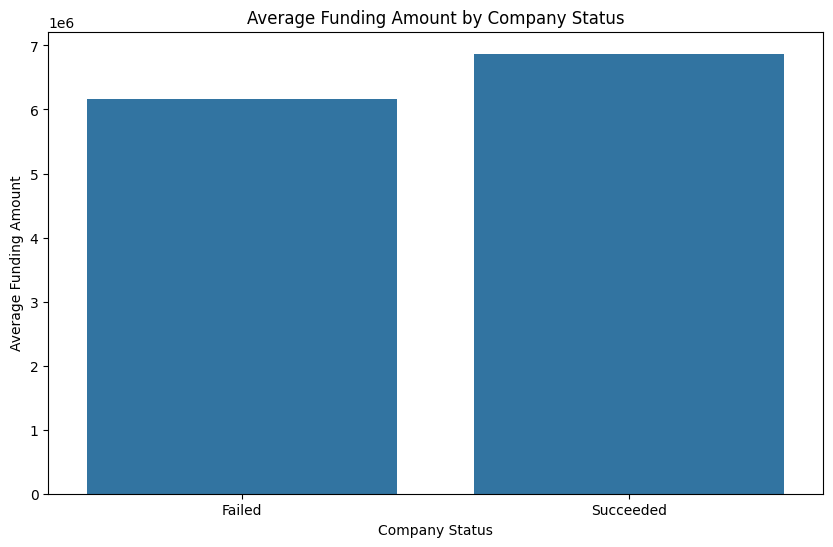

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Dependent-Company Status', y='Last Funding Amount', errorbar=None)
plt.title('Average Funding Amount by Company Status')
plt.xlabel('Company Status')
plt.ylabel('Average Funding Amount')
plt.xticks(ticks=[0, 1], labels=['Failed', 'Succeeded'])
plt.show()



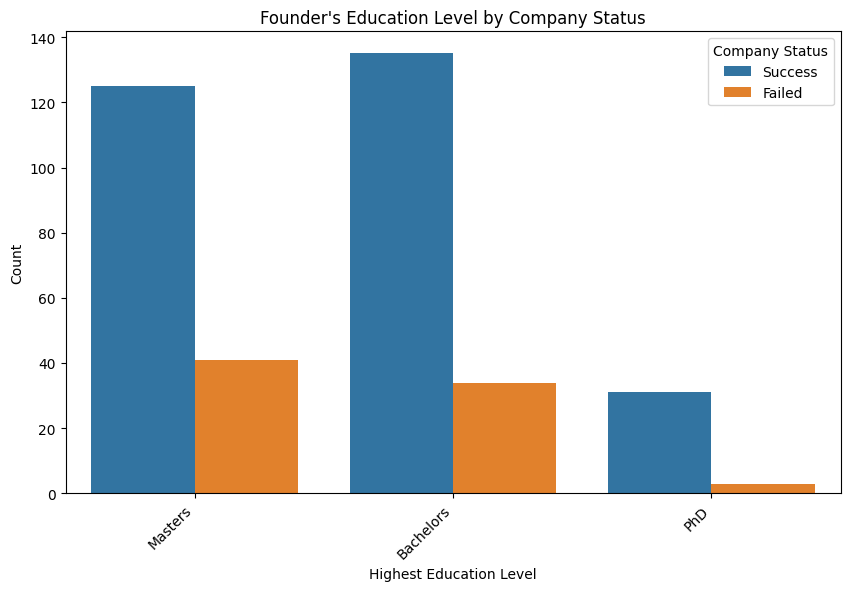

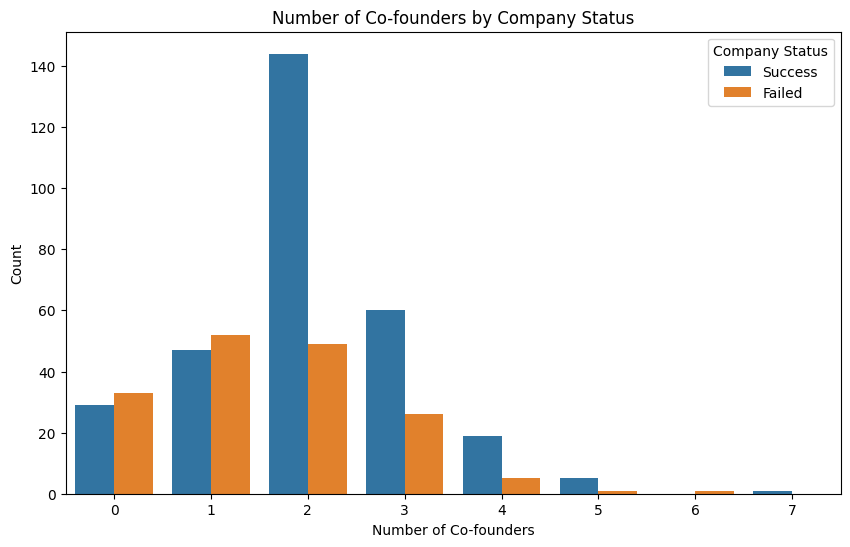

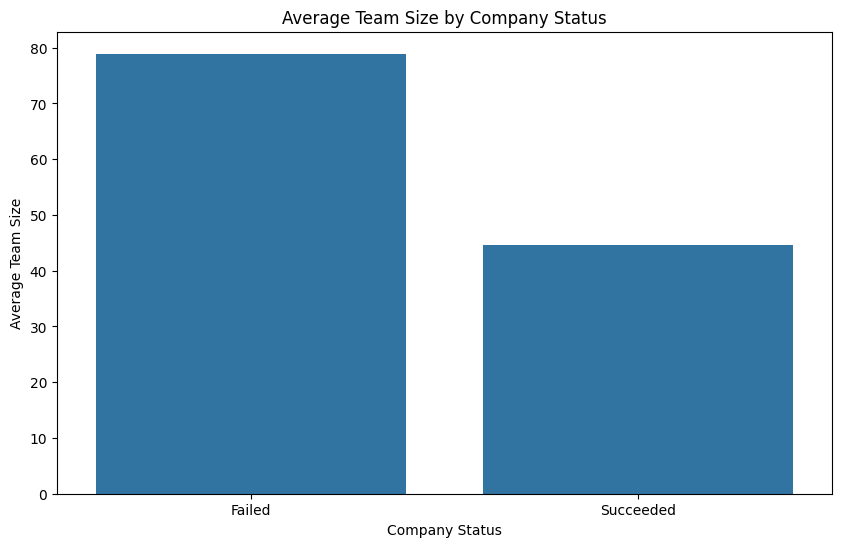

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Highest education', hue='Dependent-Company Status')
plt.title("Founder's Education Level by Company Status")
plt.xlabel("Highest Education Level")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Company Status')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Number of Co-founders', hue='Dependent-Company Status')
plt.title("Number of Co-founders by Company Status")
plt.xlabel("Number of Co-founders")
plt.ylabel("Count")
plt.legend(title='Company Status')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Dependent-Company Status', y='Team size all employees', errorbar=None)
plt.title('Average Team Size by Company Status')
plt.xlabel('Company Status')
plt.ylabel('Average Team Size')
plt.xticks(ticks=[0, 1], labels=['Failed', 'Succeeded'])
plt.show()



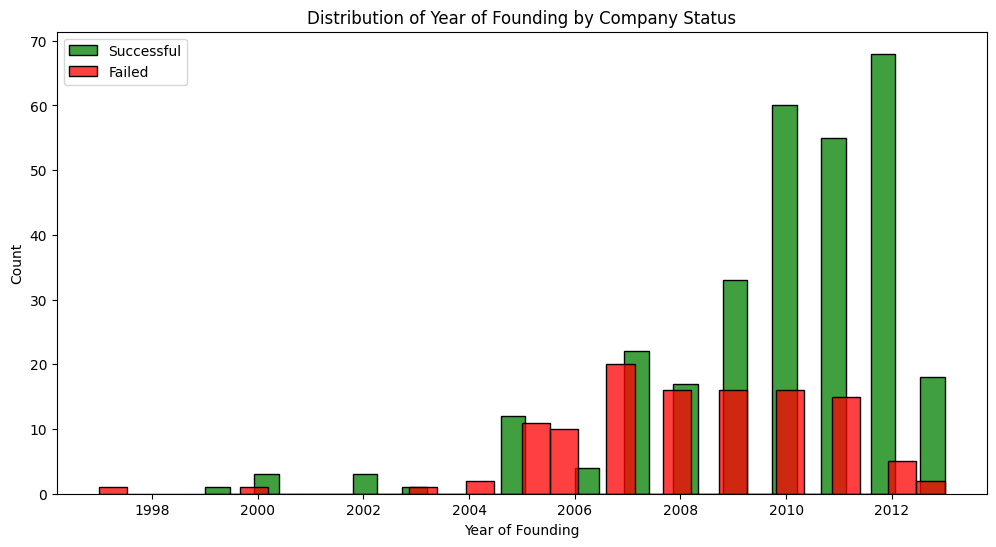

In [65]:
plt.figure(figsize=(12, 6))

# Filter data for successful and failed companies
successful = data[data['Dependent-Company Status'] == 1]
failed = data[data['Dependent-Company Status'] == 0]

# Plot histogram for successful companies
sns.histplot(data=successful, x='year of founding', color='green', bins=30, label='Successful')

# Plot histogram for failed companies
sns.histplot(data=failed, x='year of founding', color='red', bins=30, label='Failed')

plt.title('Distribution of Year of Founding by Company Status')
plt.xlabel('Year of Founding')
plt.ylabel('Count')
plt.legend()
plt.show()


The bar chart displays startup counts by year and their success or failure rates. Most startups initiated in 2010, then 2012 and 2011. Years like 2009, 2007, 2005, 2008, and 2013 had average startup counts. 2012 had the highest success rate, followed by 2010  and 2011. Conversely, 2006 saw the highest failure rate, followed by 2005  and 2007 .

In [67]:
startup_year_status_counts


status,Closed,Operating
startup_year,,
2010,0,1
2011,1,0
2012,0,1
2013,0,1


In [70]:
print("Length of index:", len(startup_year_status_counts.index))
print("Length of sum:", len(startup_year_status_counts.sum(axis=1)))


Length of index: 4
Length of sum: 4


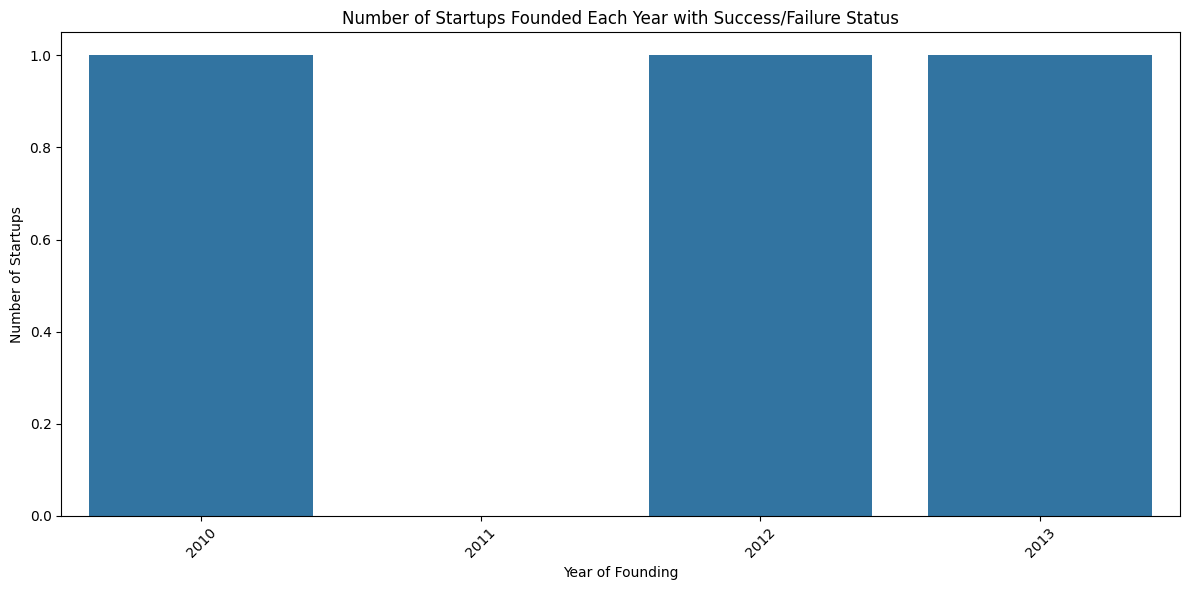

In [71]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=startup_year_status_counts.index, y=startup_year_status_counts.iloc[:,1])
plt.title('Number of Startups Founded Each Year with Success/Failure Status')
plt.xlabel('Year of Founding')
plt.ylabel('Number of Startups')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


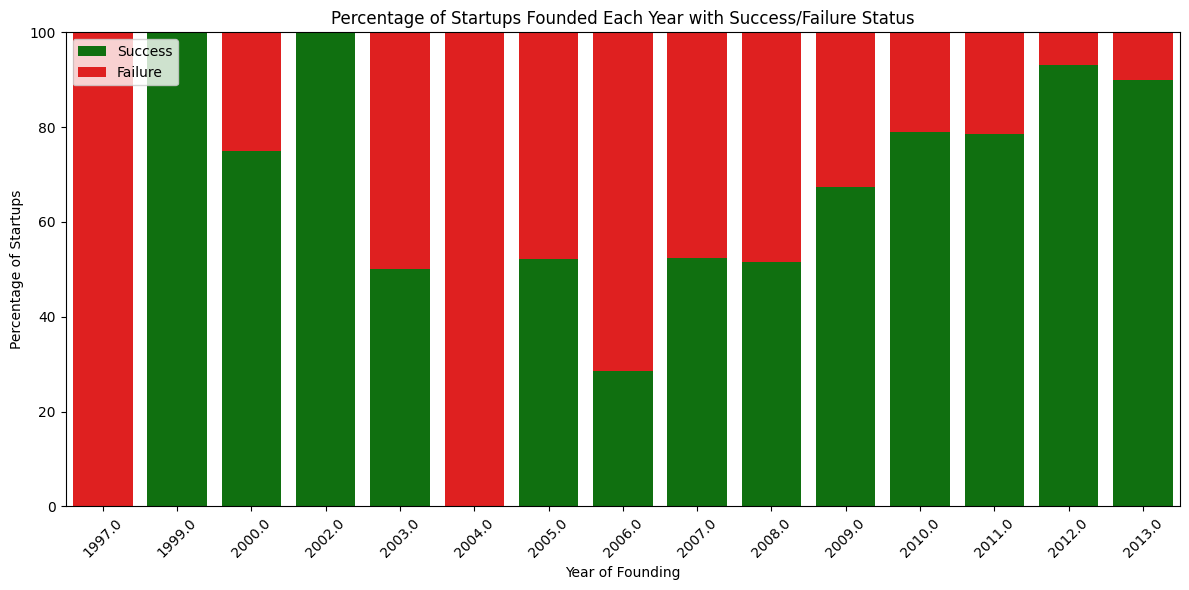

In [72]:
startup_year_status_counts.columns
# Calculate the success and failure counts for each year
startup_year_status_counts = data.groupby('year of founding')['Dependent-Company Status'].value_counts().unstack(fill_value=0)

# Calculate the total count for each year
startup_year_status_counts['total'] = startup_year_status_counts.sum(axis=1)

# Calculate the percentage of success and failure for each year
startup_year_status_counts['success_percentage'] = (startup_year_status_counts[1] / startup_year_status_counts['total']) * 100
startup_year_status_counts['failure_percentage'] = (startup_year_status_counts[0] / startup_year_status_counts['total']) * 100

# Plotting the stacked bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=startup_year_status_counts.index, y=startup_year_status_counts['success_percentage'], color='green', label='Success')
sns.barplot(x=startup_year_status_counts.index, y=startup_year_status_counts['failure_percentage'], bottom=startup_year_status_counts['success_percentage'], color='red', label='Failure')
plt.title('Percentage of Startups Founded Each Year with Success/Failure Status')
plt.xlabel('Year of Founding')
plt.ylabel('Percentage of Startups')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



This  segment creates a stacked bar chart showing the percentage of startups founded each year categorized by success and failure status. It first calculates the counts and percentages of success and failure for each year

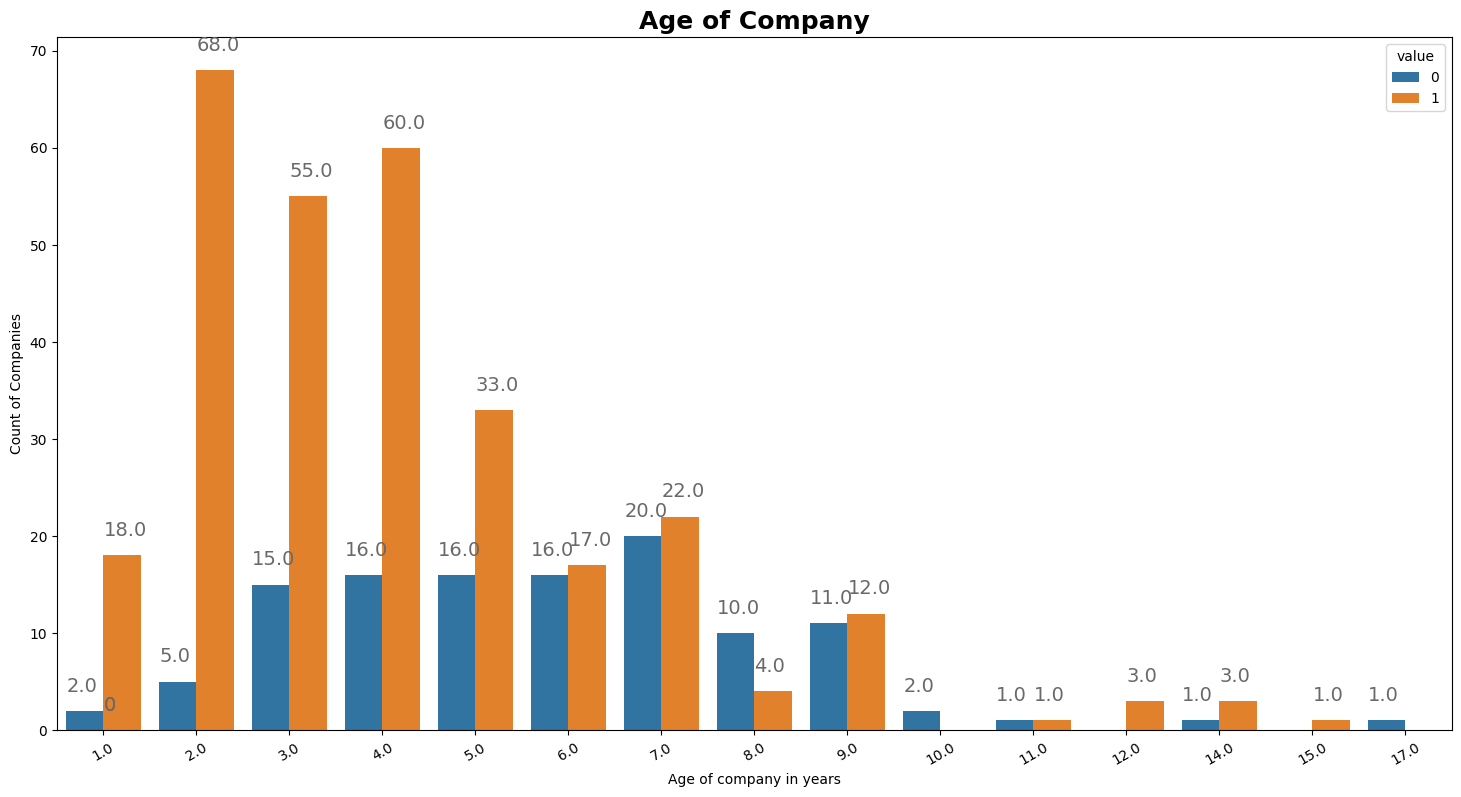

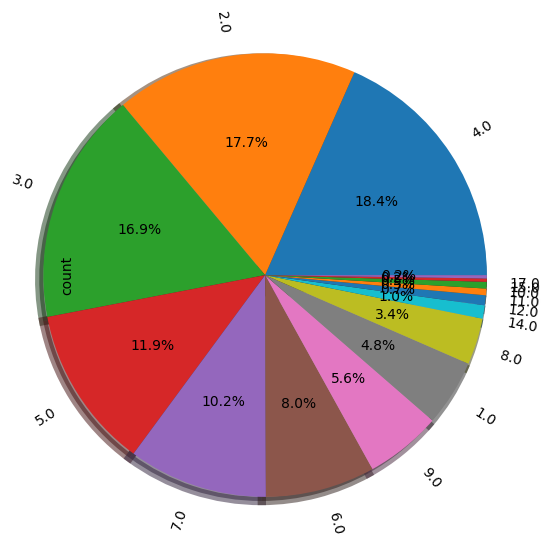

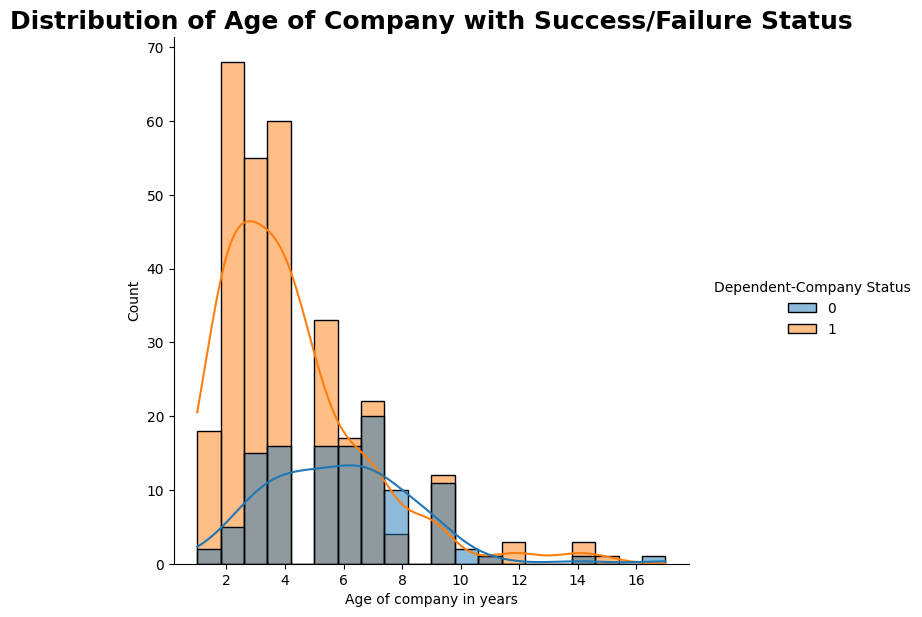

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

font = {'weight': 'bold', 'size': 18}

# Melt the DataFrame to long-form data
melted_data = data.melt(id_vars=['Age of company in years'], value_vars=['Dependent-Company Status'])

# Count plot with Hue
plt.figure(figsize=(18, 9))
ax = sns.countplot(data=melted_data, x='Age of company in years', hue='value')
plt.title("Age of Company", **font)
plt.ylabel("Count of Companies")
plt.xticks(rotation=30)

for i in ax.patches:
    ax.text(i.get_x(), i.get_height() + 2, str(round((i.get_height()), 2)), fontsize=14, color='dimgrey')
plt.show()

# Pie plot
data["Age of company in years"].value_counts().plot.pie(autopct="%.1f%%", shadow=True, rotatelabels=True,
                                                        wedgeprops={'linewidth': 6}, radius=1.5)
plt.show()

# Distribution plot with Hue
sns.displot(data, x='Age of company in years', hue='Dependent-Company Status', height=6, kde=True)
plt.title("Distribution of Age of Company with Success/Failure Status", **font)
plt.show()



Inferences from the above charts:

**Bar chart:**
Companies aged less than 5 years have higher success rates.

**Pie Chart:**
About 53% of startups are less than 5 years old.
The remaining 47% are older than 5 years.

**Distribution plot:**
Successful companies tend to be younger on average compared to failed ones.
Recently founded startups show higher success rates than older ones.

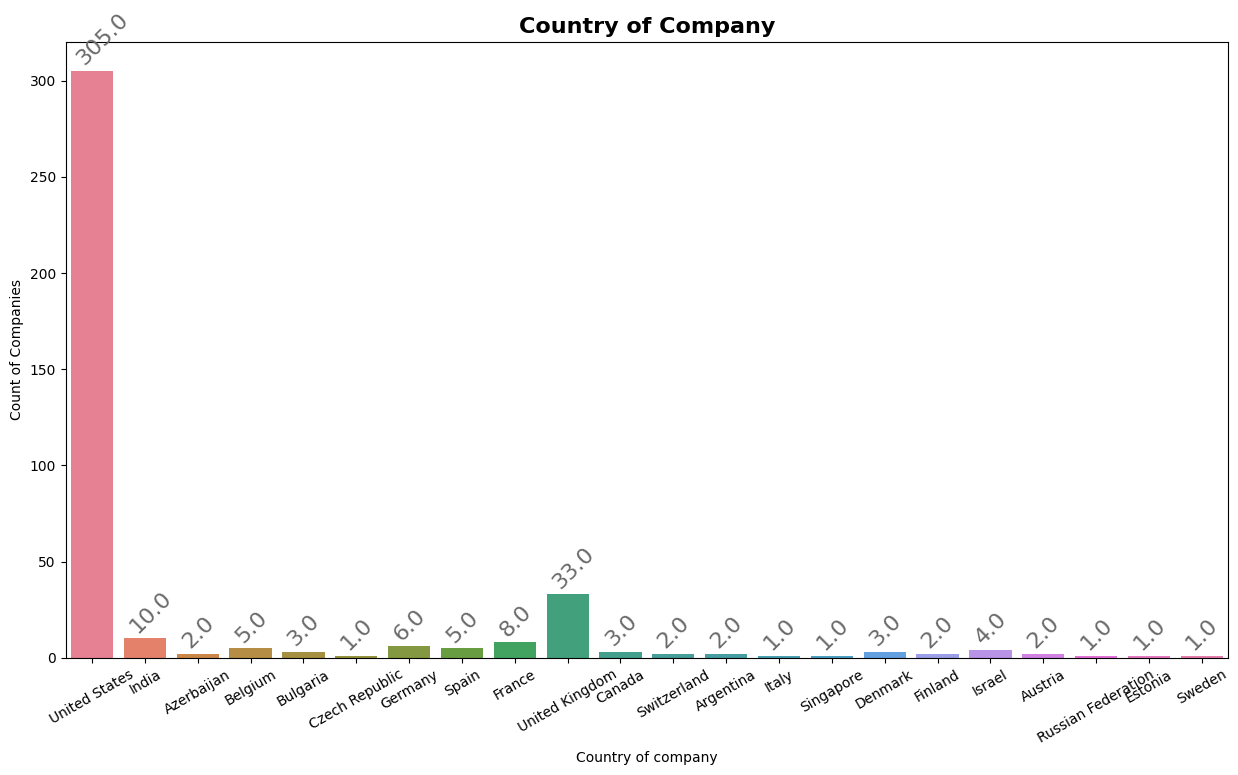

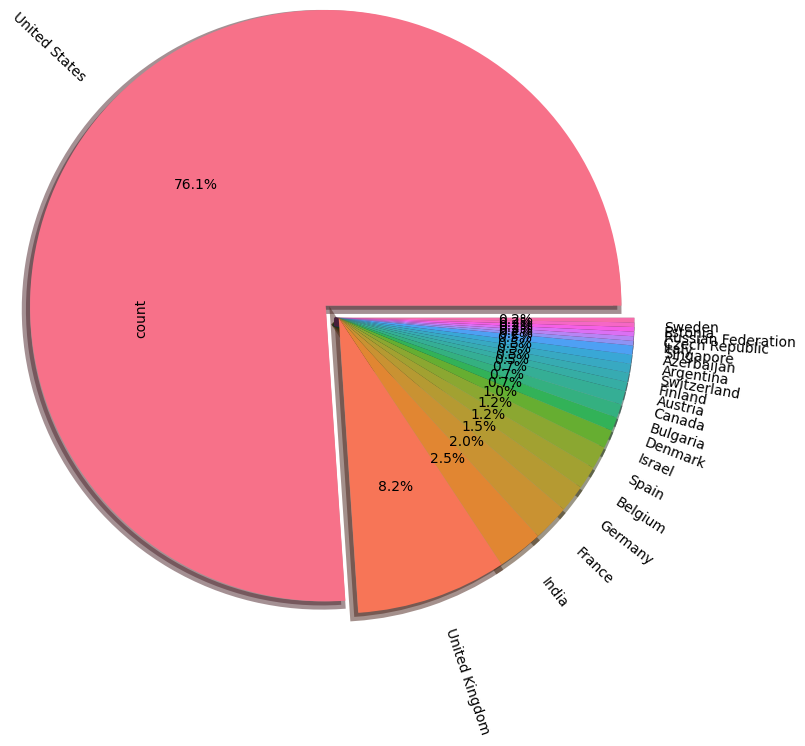

In [78]:
font = {'weight': 'bold', 'size': 16}

# Custom color palette for count plot
custom_palette = sns.color_palette("husl", len(data["Country of company"].dropna().unique()))

# Count plot
plt.figure(figsize=(15, 8))
ax = sns.countplot(data=data, x="Country of company", hue="Country of company", palette=custom_palette, legend=False)
plt.title("Country of Company", **font)
plt.ylabel("Count of Companies")
plt.xticks(rotation=30)

for i in ax.patches:
    ax.text(i.get_x() + .04, i.get_height() + 3, str(round((i.get_height()), 2)), fontsize=16, color='dimgrey', rotation=45)
plt.show()

# Custom colors for pie plot
custom_colors = sns.color_palette("husl", len(data["Country of company"].dropna().unique()))

# Pie plot
data["Country of company"].value_counts().plot.pie(autopct="%.1f%%", explode=[0.12] + [0.0] * 21,
                                                    shadow=True, rotatelabels=True,
                                                    wedgeprops={'linewidth': 6}, radius=2,
                                                    colors=custom_colors)
plt.show()




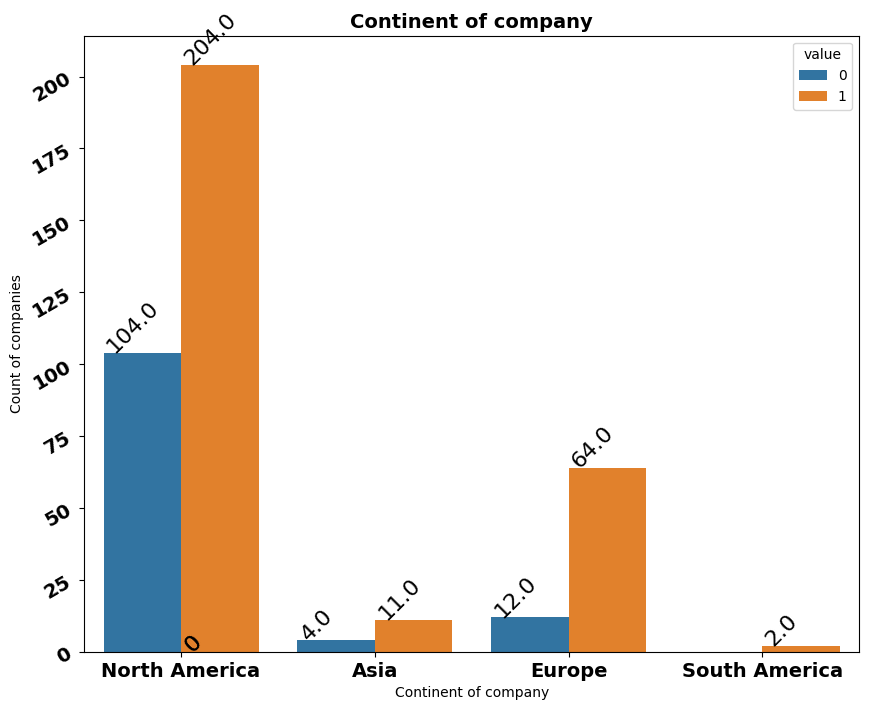

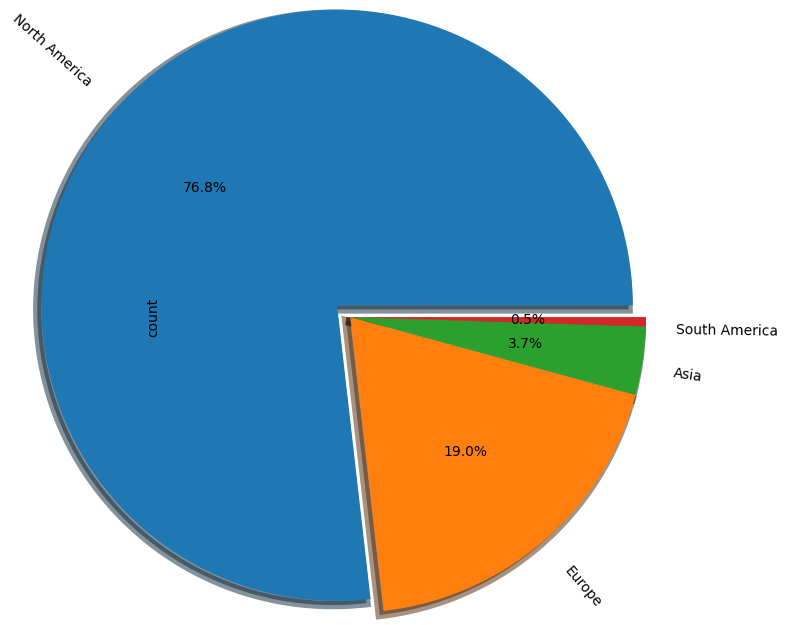

In [129]:
font = {'weight': 'bold', 'size': 14}

# Melt the DataFrame to long-form data
melted_data = data.melt(id_vars=['Continent of company'], value_vars=['Dependent-Company Status'])

# Count plot with Hue
plt.figure(figsize=(10, 8))
ax = sns.countplot(data=melted_data, x='Continent of company', hue='value')
plt.title("Continent of company", **font)
plt.ylabel("Count of companies")
plt.yticks(rotation=30, **font)
plt.xticks(**font)

# Create a list to collect the plt.patches data
for i in ax.patches:
    ax.text(i.get_x(), i.get_height(), str(round((i.get_height()), 2)), fontsize=16, color='Black', rotation=45)

plt.show()

# Pie plot
data["Continent of company"].value_counts().astype(int).plot.pie(autopct="%.1f%%", explode=[0.12, 0.0, 0.0, 0.0],
                                                                shadow=True, rotatelabels=True,
                                                                wedgeprops={'linewidth': 6}, radius=2)

plt.show()



***Observations:***

**Bar chart:**
- South America has the highest success rate (100%), but only 2 companies were founded there.
- Europe follows with a success rate of 84.21%, then Asia with 73.33%, and North America with 66.23%.

**Pie Chart:**
- Most startups are founded in North America, accounting for 76.8% of the total.
- Europe follows with 19% of the total.
- India has a share of only 2.5% of the startups.


<Figure size 1000x1000 with 0 Axes>

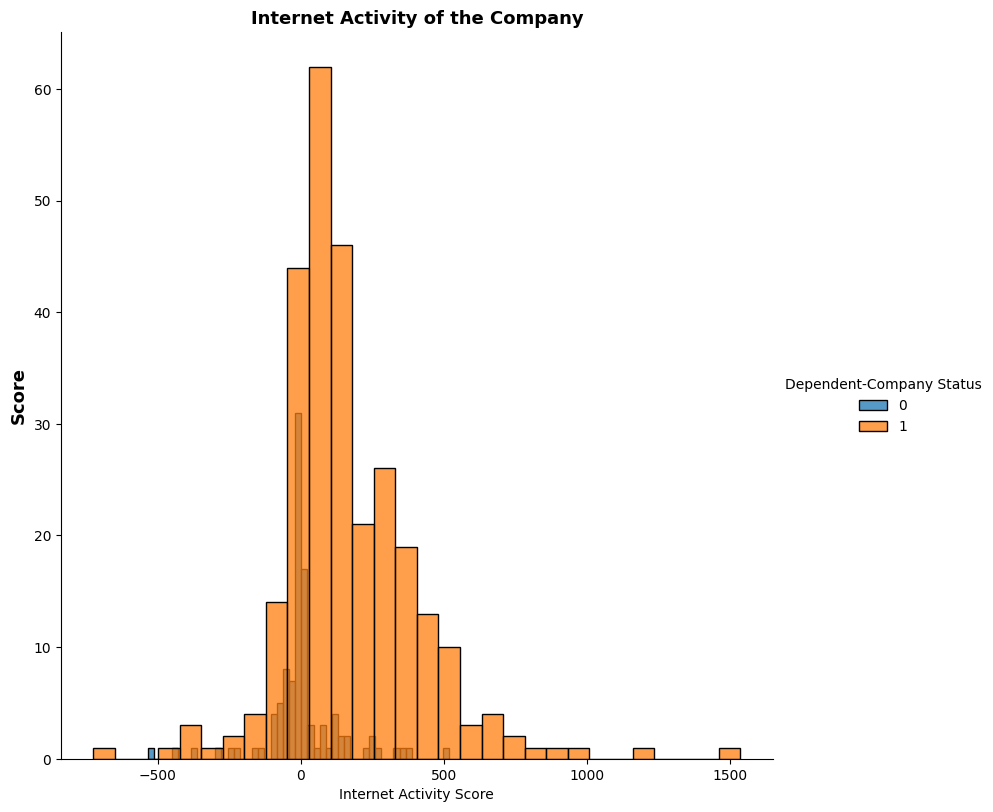

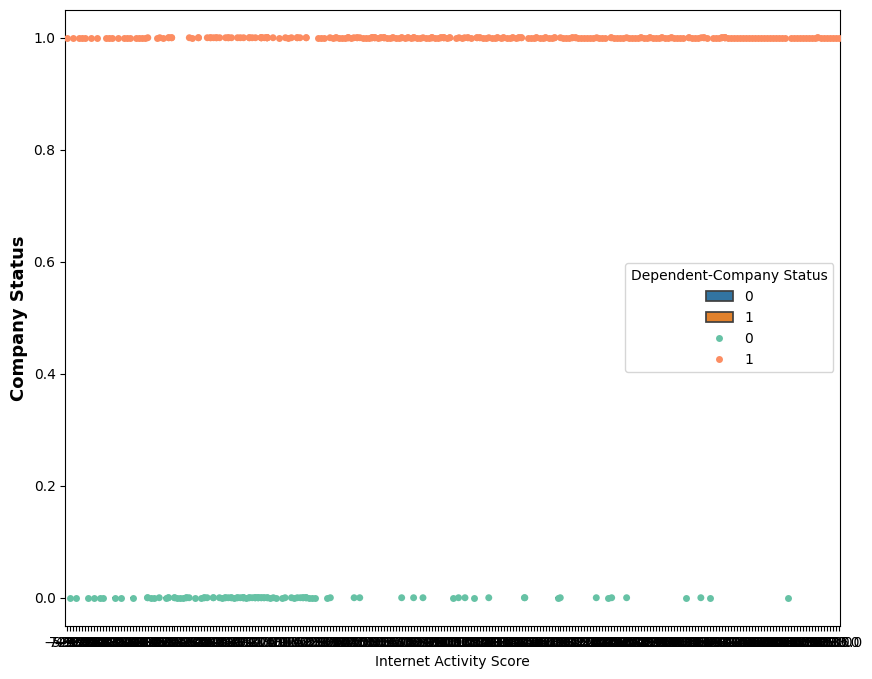

In [131]:
font = {'weight': 'bold', 'size': 13}

# Distribution plot with Hue
plt.figure(figsize=(10, 10))
sns.FacetGrid(data, hue='Dependent-Company Status', height=8).map(sns.histplot, 'Internet Activity Score').add_legend()
plt.title("Internet Activity of the Company", **font)
plt.ylabel("Score", **font)
plt.show()

# Violin plot with Hue
plt.figure(figsize=(10, 8))
sns.violinplot(data=data, y='Dependent-Company Status', x='Internet Activity Score', hue='Dependent-Company Status',
               split=True)
sns.stripplot(data=data, y='Dependent-Company Status', x='Internet Activity Score', hue='Dependent-Company Status',
              jitter=True, palette="Set2")
plt.ylabel("Company Status", **font)
plt.show()



***Observations:***

Internet Activity Score reflects a startup's online presence.
Successful companies exhibit high internet activity scores (0-1000), indicating strong online engagement.
Conversely, failed companies have notably lower scores, suggesting poor online marketing strategies.
Thus, weak online marketing strategies may contribute to company failure.

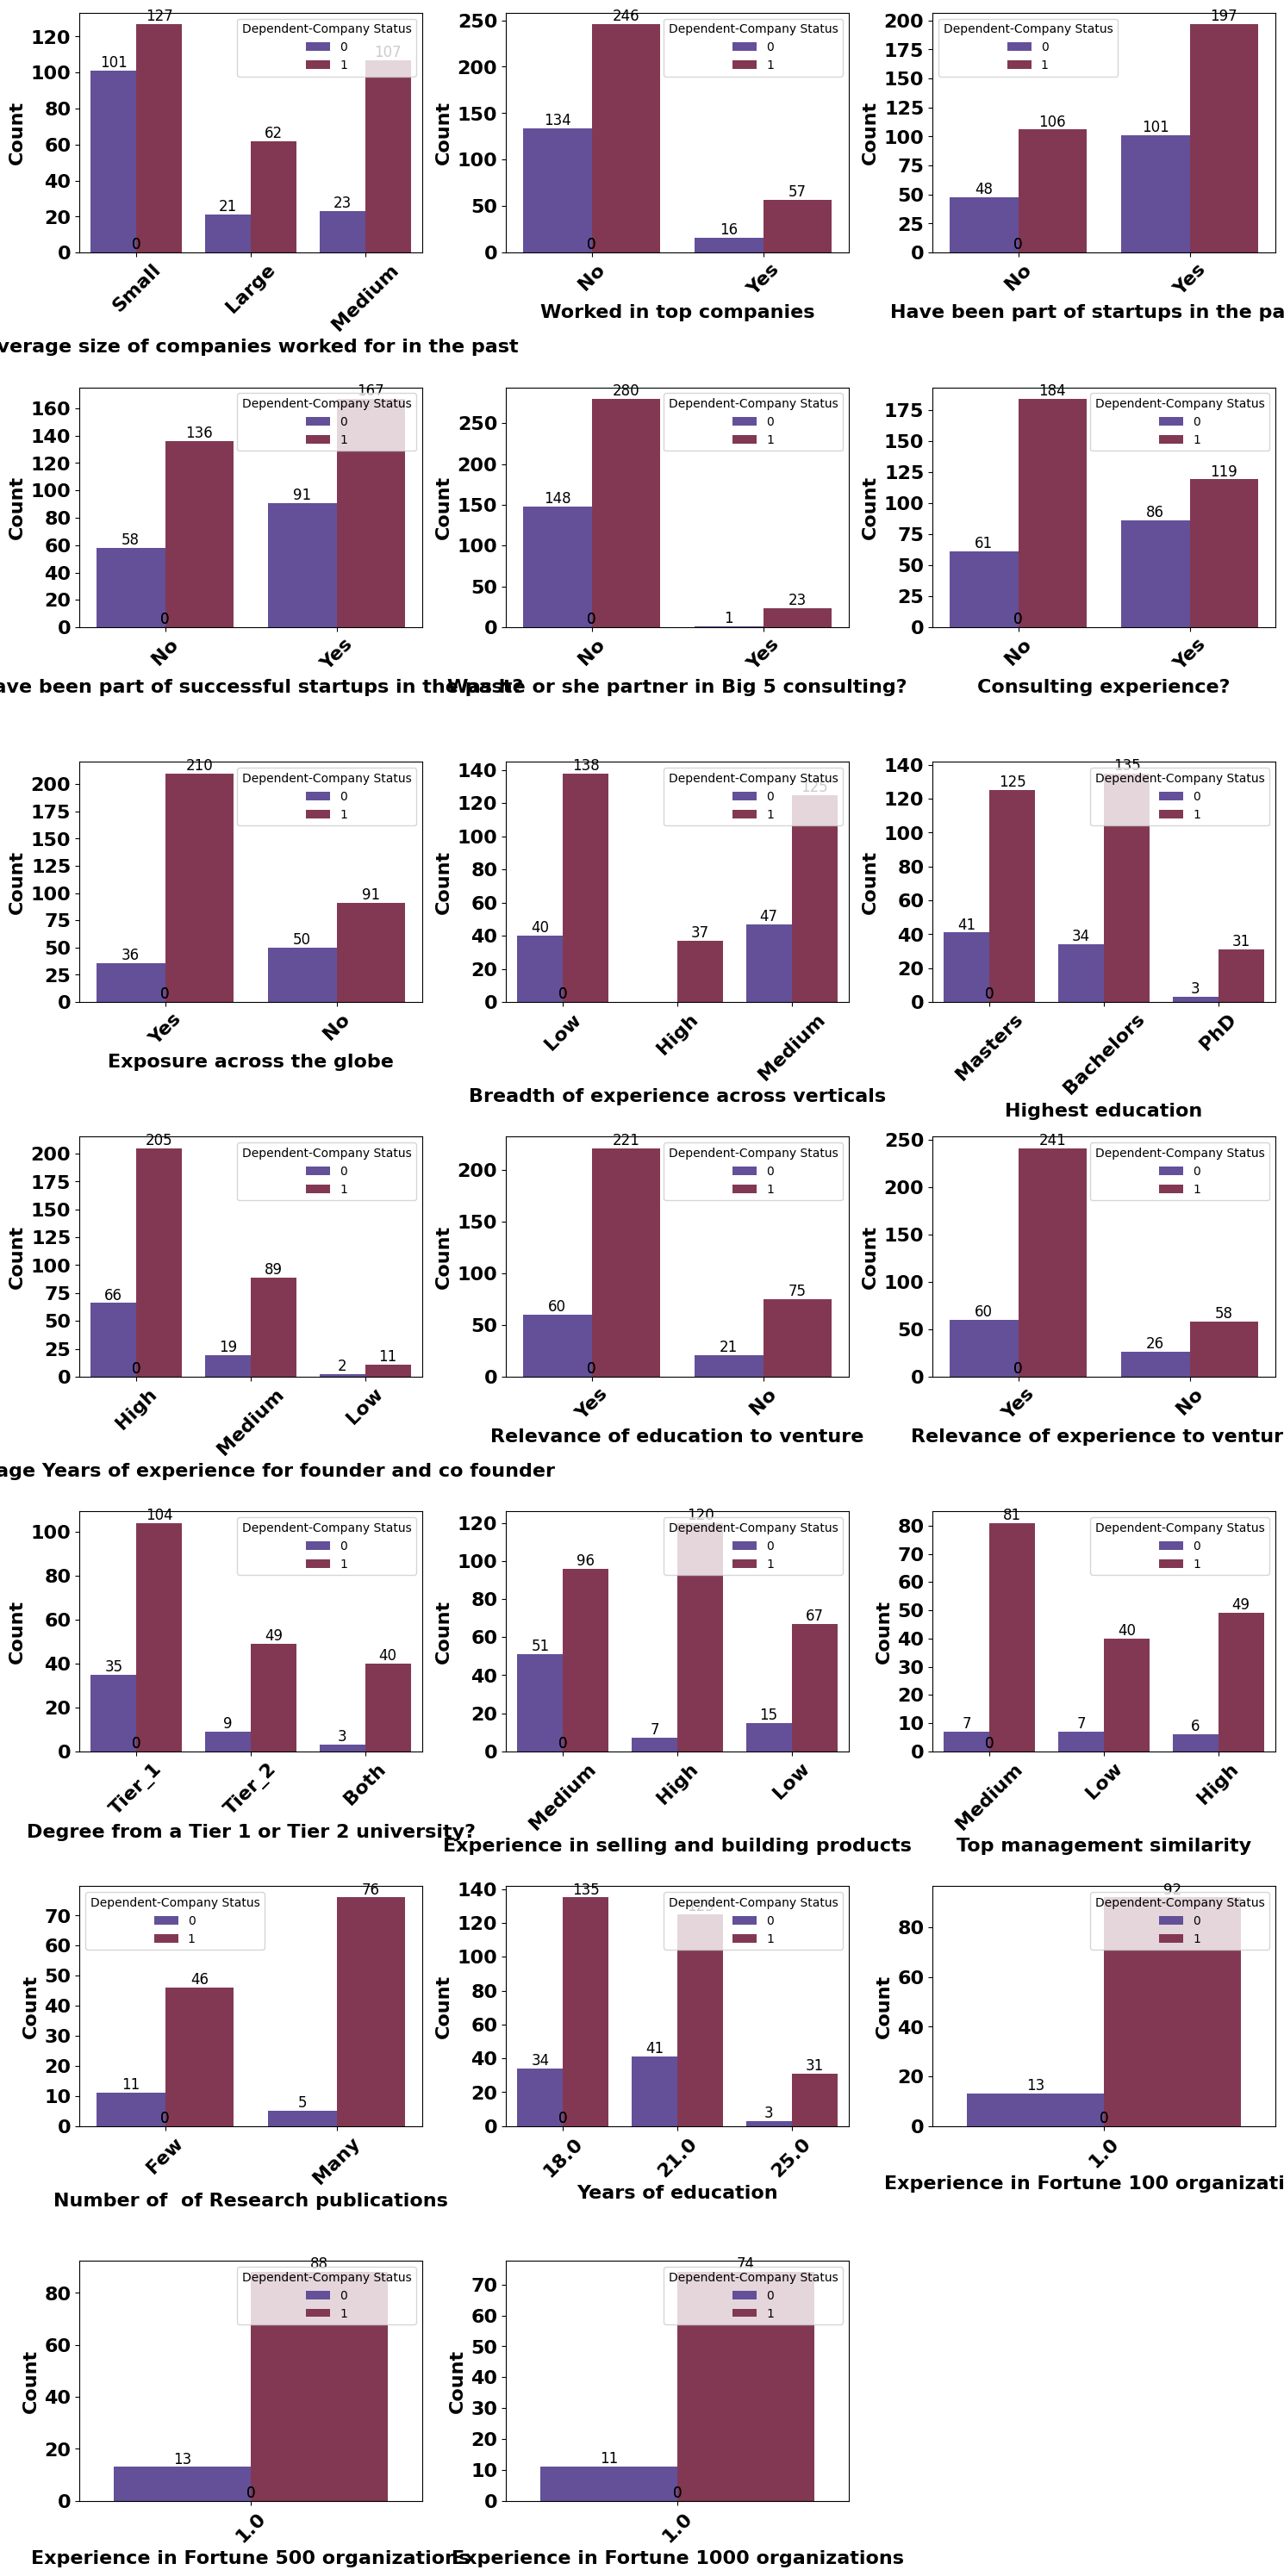

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the twilight color palette with only two colors
twilight_palette = sns.color_palette("twilight", 2)

cat_columns = [
    "Average size of companies worked for in the past",
    'Worked in top companies',
    "Have been part of startups in the past?",
    "Have been part of successful startups in the past?",
    "Was he or she partner in Big 5 consulting?",
    "Consulting experience?",
    "Exposure across the globe",
    "Breadth of experience across verticals",
    "Highest education",
    'Average Years of experience for founder and co founder',
    "Relevance of education to venture",
    "Relevance of experience to venture",
    "Degree from a Tier 1 or Tier 2 university?",
    "Experience in selling and building products",
    "Top management similarity",
    "Number of  of Research publications",
    "Years of education",
    "Experience in Fortune 100 organizations",
    "Experience in Fortune 500 organizations",
    "Experience in Fortune 1000 organizations"
]

# Reshape the dataframe to long-form
melted_data = data.melt(id_vars=["Dependent-Company Status"], value_vars=cat_columns, var_name="Feature", value_name="Value")

plt.figure(figsize=(15, 30))
for i, column in enumerate(cat_columns, start=1):
    plt.subplot(7, 3, i)
    ax = sns.countplot(data=melted_data[melted_data["Feature"] == column].dropna(),
                       x="Value", palette=twilight_palette, hue="Dependent-Company Status")
    plt.xticks(rotation=45, **font)
    plt.yticks(**font)
    plt.xlabel(column, **font)
    plt.ylabel("Count", **font)
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()),
                fontsize=12, color='black', ha='center', va='bottom')
plt.tight_layout()
plt.show()



***Interesting Observations:***

1. Startups started by people who worked in top companies are often more successful.
2. Startups led by founders who published research papers tend to succeed.
3. Founders from prestigious universities have higher success rates.
4. Interestingly, founders with bachelor's degrees are more successful than those with PhDs or master's degrees.
5. Founders with lots of consulting experience tend to have more successful startups.

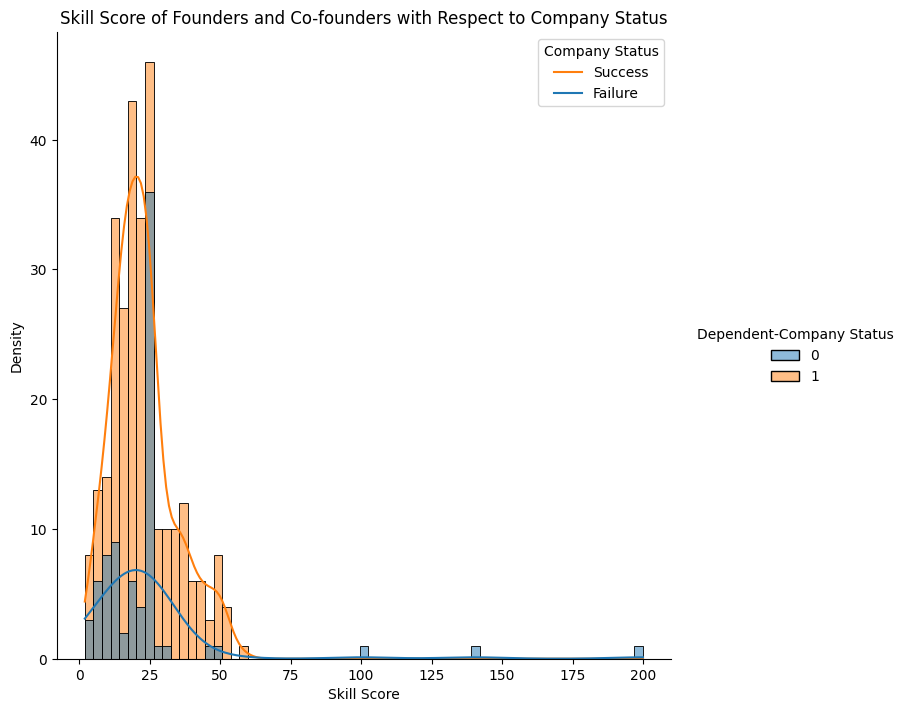

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a FacetGrid with displot
sns.displot(data, x="Skills score", hue="Dependent-Company Status", height=7, kde=True)
plt.legend(title="Company Status", labels=["Success", "Failure"])  # Specify labels for the legend
plt.title("Skill Score of Founders and Co-founders with Respect to Company Status")
plt.xlabel("Skill Score")
plt.ylabel("Density")
plt.show()


***The plot above suggests that the skill score of founders or co-founders does not affect the company's status. The distribution of both successful and failed startups is the same.***

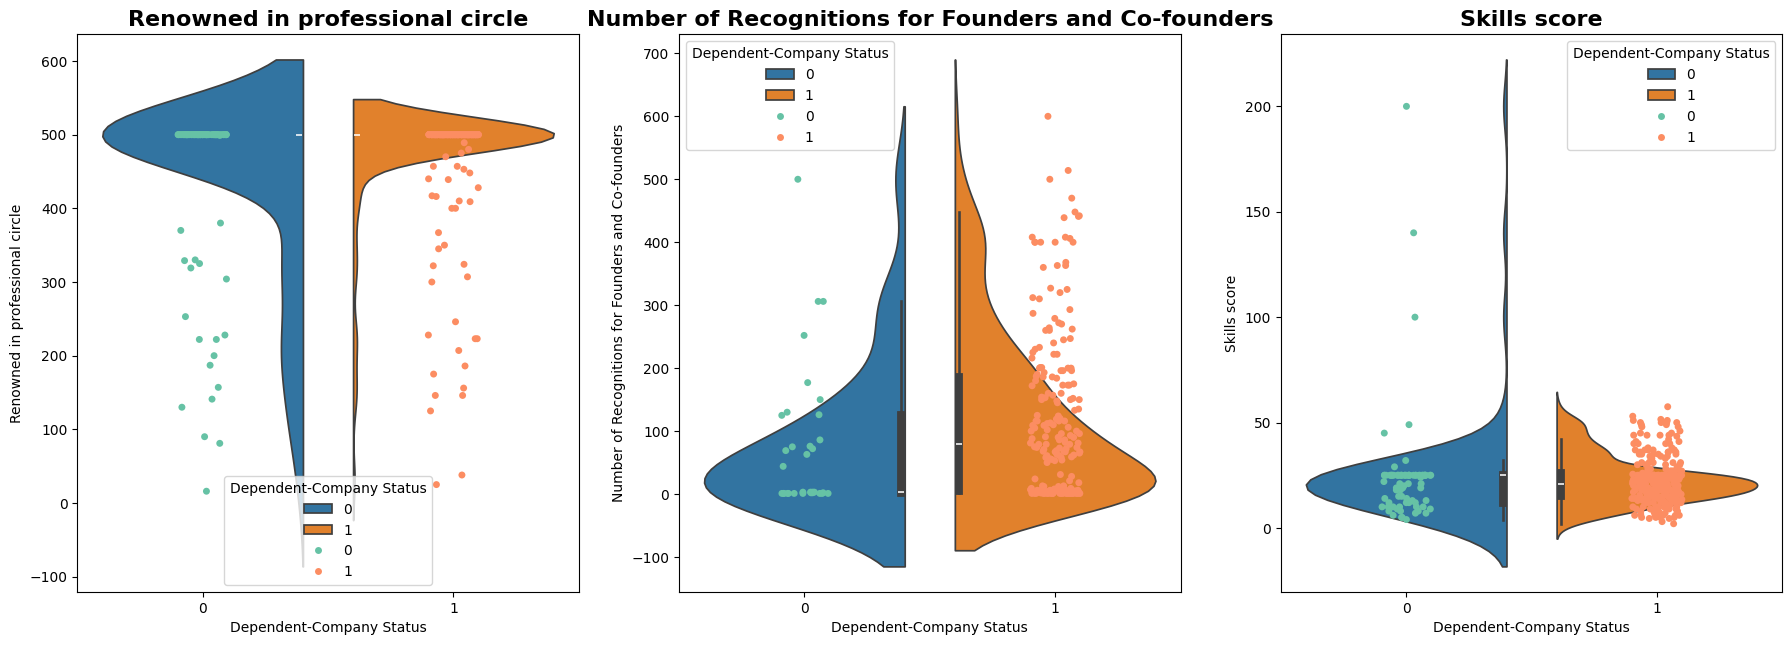

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

num_columns = ["Renowned in professional circle", "Number of Recognitions for Founders and Co-founders", "Skills score"]

plt.figure(figsize=(22, 42))
for i, column in enumerate(num_columns, start=1):
    plt.subplot(5, 3, i)
    sns.violinplot(data=data, x='Dependent-Company Status', y=data[column], hue='Dependent-Company Status', split=True)
    sns.stripplot(data=data, x='Dependent-Company Status', y=data[column], hue='Dependent-Company Status', jitter=True, palette="Set2")
    plt.title(column, **font)
plt.show()


These plots help understand the relationship between certain numerical features and the success or failure of startups

# **In conclusion the campany's success or failure hinges on several key factors:**

# **Success:**
1. **Data Preprocessing**: Correcting data errors and ensuring consistency lays a strong foundation for accurate analysis.
2. **Feature Analysis**: Identifying crucial factors like co-founder count, legal expertise, and funding significantly impacts success.
3. **Strategic Decisions**: Focusing on correlated factors aids in making informed decisions.
4. **Market Understanding**: Recognizing regional and age-related trends provides valuable insights for success.

# Failure:
1. **Weak Online Presence**: Low internet activity signals ineffective marketing strategies, crucial in the digital age.
2. **Lack of Market Insight**: Inadequate market research leads to missteps in identifying opportunities and risks.
3. **Founder Qualifications**: Relevant experience and education greatly influence a startup's trajectory.
4. **Financial Support**: Insufficient funding or investor backing increases the risk of failure.

**In summary, success or failure is determined by effective data handling, insightful analysis, strategic decision-making, market awareness, and adequate financial backing. Addressing these aspects can enhance campaign outcomes and minimize risks.**